In [2]:
import sys 
sys.path.append('..')
import alpenglow.files as af
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.external.tifffile as tiff
from skimage import transform
from skimage import img_as_int
import numpy as np
import shutil as sh
import os
import boto3
from scipy import optimize
import alpenglow.stitching
from imp import reload
reload(alpenglow.stitching)
reload(alpenglow.files)
from alpenglow.stitching import stitch, find_shift, apply_shift

In [3]:
from skimage.feature import register_translation
from skimage import img_as_float
from skimage import exposure
from skimage.io import imread_collection, ImageCollection
from skimage.external.tifffile import imread
import skimage.external.tifffile as tif
import skimage
import dask.array as da
from dask import delayed
import glob as globby

In [4]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('alpenglowoptics')
ll = list(bucket.objects.all())

In [5]:
import numpy as np
import os
import boto3


def download_s3(remote_fname, local_fname, bucket_name="alpenglowoptics"):
    """
    Download a file from S3 to our local file-system
    """
    if not os.path.exists(local_fname):
        s3 = boto3.resource('s3')
        b = s3.Bucket(bucket_name)
        b.download_file(remote_fname, local_fname)  

In [5]:
for strip in range(4, 32):
    for zlevel in range(1,65):
        fname = "im_%06d_%06d.tif" % (strip, zlevel) 
        download_s3('76AO/Strips/' + fname, '../data/AO/' + fname)    
#stopped working at im_000016, we can use 4-15

ClientError: An error occurred (404) when calling the HeadObject operation: Not Found

In [14]:
ls -f im_000015*

im_000015_000001.tif  im_000015_000023.tif  im_000015_000045.tif
im_000015_000002.tif  im_000015_000024.tif  im_000015_000046.tif
im_000015_000003.tif  im_000015_000025.tif  im_000015_000047.tif
im_000015_000004.tif  im_000015_000026.tif  im_000015_000048.tif
im_000015_000005.tif  im_000015_000027.tif  im_000015_000049.tif
im_000015_000006.tif  im_000015_000028.tif  im_000015_000050.tif
im_000015_000007.tif  im_000015_000029.tif  im_000015_000051.tif
im_000015_000008.tif  im_000015_000030.tif  im_000015_000052.tif
im_000015_000009.tif  im_000015_000031.tif  im_000015_000053.tif
im_000015_000010.tif  im_000015_000032.tif  im_000015_000054.tif
im_000015_000011.tif  im_000015_000033.tif  im_000015_000055.tif
im_000015_000012.tif  im_000015_000034.tif  im_000015_000056.tif
im_000015_000013.tif  im_000015_000035.tif  im_000015_000057.tif
im_000015_000014.tif  im_000015_000036.tif  im_000015_000058.tif
im_000015_000015.tif  im_000015_000037.tif  im_000015_000059.tif
im_000015_000016.tif  im_

In [22]:
#renaming files to remove im_
files = globby.glob("/home/nicholasreder/alpenglow/data/AO/*.tif")
for file in files:
    parts = file.split('im_')
    new_name = parts[1]
    os.rename(file, new_name)

In [35]:
p = int(np.percentile(np.arange(len(images_7)), 33)) #finding the image number of the 33rd percentile depth
test_image_7 = images_7[p]

In [12]:
len(images_7)

64

In [33]:
p

20

In [ ]:
plt.matshow(test_image_7[:,10000:15000])

In [14]:
tifCounter = len(glob.glob1("/home/nicholasreder/alpenglow/data/AO/","im_000005_0**.tif")) 
tifCounter #A better way to count depth of z within an arbitrary strip

64

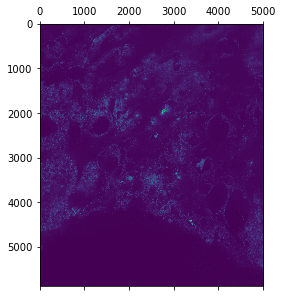

In [ ]:
#testing
p = int(np.percentile(np.arange(len(glob.glob1("/home/nicholasreder/alpenglow/data/AO/","im_000005_0**.tif"))), 33))
image1 = tif.imread('../data/AO/im_000005_%06d.tif' % p)
image2 = tif.imread('../data/AO/im_000006_%06d.tif' % p)
mosaic, shift = stitch(image1, image2) #stitching 5 with 6 to produce mosaic
for x in range (7, 15): #looping through all of the images up to 15
    image2 = tif.imread('../data/AO/im_%06d_%06d.tif' % (x, p))
    mosaic, shift = stitch(mosaic, image2)
    return mosaic
plt.matshow(mosaic[:,10000:15000])

In [ ]:
plt.matshow(mosaic)

In [6]:
def test_image(path, first_strip, last_strip, percentile = 33):
    """ 
    Return test image at specified depth within z-stack
    
    Parameters
    ----------
    path : string
        The string of the path 
    first_strip, last_strip : ints
        The index of the first strip and last strip to be stitched, *in order* (bottom, top)
    percentile: int
        Depth of test image within z-stack (larger number is deeper in stack)
    Returns
    -------
    Stitched image
    """
    p = int(np.percentile(np.arange(len(globby.glob1(path,"%06d_*.tif" % first_strip))), percentile))
    image1 = tif.imread(path + '%06d_%06d.tif' % (first_strip, p))
    image2 = tif.imread(path + '%06d_%06d.tif' % (first_strip + 1, p))
    mosaic, shift = stitch(image1, image2) 
    for x in range (first_strip + 2, last_strip): #
        image2 = tif.imread(path + '%06d_%06d.tif' % (x, p))
        mosaic, shift = stitch(mosaic, image2)
    return mosaic




In [7]:
mosaic_25 = test_image("/home/nicholasreder/alpenglow/data/AO/", 5, 15, 25)
mosaic_50 = test_image("/home/nicholasreder/alpenglow/data/AO/", 5, 15, 50)
mosaic_75 = test_image("/home/nicholasreder/alpenglow/data/AO/", 5, 15, 75)

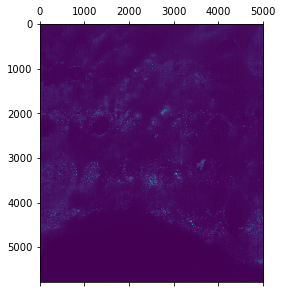

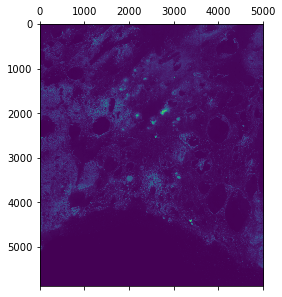

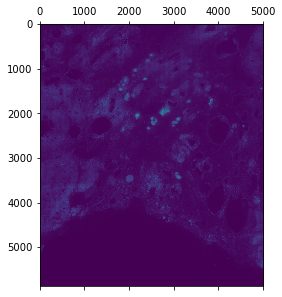

In [29]:
plt.matshow(mosaic_25[:,10000:15000])
plt.matshow(mosaic_50[:,10000:15000])
plt.matshow(mosaic_75[:,10000:15000])